In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset in pandas
df = pd.read_csv("TCS.csv")
#Droping unwanted columns
df.drop(["Date", "Adj Close"], axis=1, inplace=True)
print("Shape ->",df.shape)
df.head()

Shape -> (4628, 5)


,Open,High,Low,Close,Volume
0,38.724998,40.000000,38.724998,39.700001,212976.0
1,39.750000,40.387501,38.875000,39.162498,153576.0
2,39.250000,39.250000,35.724998,36.462502,822776.0
3,36.462502,36.462502,36.462502,36.462502,0.0
4,36.275002,38.000000,35.750000,36.375000,811856.0


In [3]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df['Close_Tom'] =  df['Close']
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,38.724998,40.000000,38.724998,212976.0,39.700001,39.700001
1,39.750000,40.387501,38.875000,153576.0,39.162498,39.162498
2,39.250000,39.250000,35.724998,822776.0,36.462502,36.462502
3,36.462502,36.462502,36.462502,0.0,36.462502,36.462502
4,36.275002,38.000000,35.750000,811856.0,36.375000,36.375000


In [4]:
#Shifting whole dataset down by one row so we can use yesterdays data to predict todays closing price
df['Close_Tom'] =  df['Close_Tom'].shift(-1)
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,38.724998,40.000000,38.724998,212976.0,39.700001,39.162498
1,39.750000,40.387501,38.875000,153576.0,39.162498,36.462502
2,39.250000,39.250000,35.724998,822776.0,36.462502,36.462502
3,36.462502,36.462502,36.462502,0.0,36.462502,36.375000
4,36.275002,38.000000,35.750000,811856.0,36.375000,35.474998


In [5]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close', 'Close_Tom']]
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,38.724998,40.000000,38.724998,212976.0,39.700001,39.162498
1,39.750000,40.387501,38.875000,153576.0,39.162498,36.462502
2,39.250000,39.250000,35.724998,822776.0,36.462502,36.462502
3,36.462502,36.462502,36.462502,0.0,36.462502,36.375000
4,36.275002,38.000000,35.750000,811856.0,36.375000,35.474998


In [6]:
#Filling null values using pad values, will fill next rows values to empty cells
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Open         0
High         0
Low          0
Volume       0
Close        0
Close_Tom    0
dtype: int64

<AxesSubplot:>

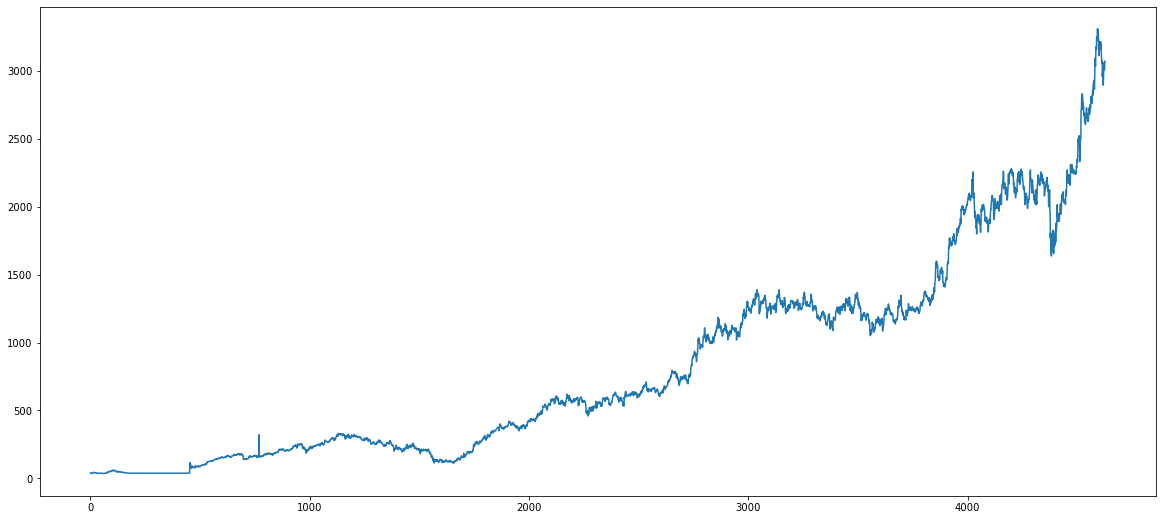

In [7]:
#Dataset Plotted
df['Close'].plot(figsize=(20,9))

In [8]:
#columns for x and y
x  = df[['Open','High','Low','Volume', 'Close']]
y = df['Close_Tom']

In [9]:
#Normalising data
scaler = MinMaxScaler()
df[['Open','High','Low','Volume', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Volume', 'Close']])
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,0.000917,0.001075,0.001106,0.002418,0.001291,39.162498
1,0.001230,0.001192,0.001152,0.001744,0.001127,36.462502
2,0.001077,0.000848,0.000181,0.009343,0.000302,36.462502
3,0.000225,0.000004,0.000409,0.000000,0.000302,36.375000
4,0.000168,0.000469,0.000189,0.009219,0.000275,35.474998


In [10]:
#Splitting data
x_train , x_test , y_train , y_test = train_test_split(x ,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3449, 5)
(1150, 5)
(3449,)
(1150,)


---
# Random Forest

In [11]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
model_rf.fit(x_train, y_train)   

RandomForestRegressor(random_state=0)

In [12]:
#predicting stock price using our model
preds_rf = model_rf.predict(x_test)

dfpred_rf = pd.DataFrame({'Actual':y_test,'Predicted':preds_rf, 'Difference':abs(y_test-preds_rf)})
dfpred_rf.head(10)

,Actual,Predicted,Difference
4053,1872.849976,1903.854991,31.005015
2052,470.450012,470.156748,0.293264
2885,1082.699951,1085.541499,2.841548
693,175.199997,173.188675,2.011322
1074,270.024994,271.288003,1.263009
809,182.787506,180.351500,2.436006
472,78.675003,80.359126,1.684123
2587,640.349976,648.749992,8.400016
1837,342.875000,344.453879,1.578879
1391,218.437500,212.481923,5.955577


In [13]:
#Different Metrics calculated using our model
print("Score:", model_rf.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_rf))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_rf))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_rf))**0.5)
print('Loss:', abs(y_test-preds_rf).mean())

Score: 0.9991925816374461
Mean Absolute Error: 11.795249497858876
Mean Squared  Error: 445.14181706397517
Root Mean Squared Error: 21.0983842287502
Loss: 11.795249497858876


---
# k-NN

In [14]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=7)
model_knn.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [15]:
#predicting stock price using our model
preds_knn = model_knn.predict(x_test)

dfpred_knn = pd.DataFrame({'Actual':y_test,'Predicted':preds_knn, 'Difference':abs(y_test-preds_knn)})
dfpred_knn.head(10)

,Actual,Predicted,Difference
4053,1872.849976,1626.724976,246.125000
2052,470.450012,592.975006,122.524994
2885,1082.699951,797.543732,285.156220
693,175.199997,229.131248,53.931252
1074,270.024994,568.762482,298.737488
809,182.787506,643.924988,461.137482
472,78.675003,103.187500,24.512497
2587,640.349976,1166.424988,526.075012
1837,342.875000,200.099998,142.775002
1391,218.437500,201.099995,17.337505


In [16]:
model_knn.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [17]:
#Different Metrics calculated using our model
print("Score:", model_knn.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_knn))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_knn))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_knn))**0.5)
print('Loss:', abs(y_test-preds_knn).mean())

Score: 0.35264175281153953
Mean Absolute Error: 404.4972280373913
Mean Squared  Error: 356898.2819926436
Root Mean Squared Error: 597.4096433709817
Loss: 404.4972280373913


---
# Decision Tree

In [18]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [19]:
#predicting stock price using our model
preds_dt = model_dt.predict(x_test)

dfpred_dt = pd.DataFrame({'Actual':y_test,'Predicted':preds_dt, 'Difference':abs(y_test-preds_dt)})
dfpred_dt.head(10)

,Actual,Predicted,Difference
4053,1872.849976,1875.099976,2.250000
2052,470.450012,475.350006,4.899994
2885,1082.699951,1076.650024,6.049927
693,175.199997,174.032501,1.167496
1074,270.024994,266.737488,3.287506
809,182.787506,178.470001,4.317505
472,78.675003,80.000000,1.324997
2587,640.349976,638.299988,2.049988
1837,342.875000,346.575012,3.700012
1391,218.437500,199.649994,18.787506


In [20]:
#Different Metrics calculated using our model
print("Score:", model_dt.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_dt))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_dt))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_dt))**0.5)
print('Loss:', abs(y_test-preds_dt).mean())

Score: 0.9985102007372043
Mean Absolute Error: 16.203543753472143
Mean Squared  Error: 821.3486113985954
Root Mean Squared Error: 28.659180229005074
Loss: 16.203543753472143


---
# Linear Regression

In [21]:
#linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [22]:
#Coefficients and Intercept of LR
print(model_lr.coef_)
print(model_lr.intercept_)

[-4.09975330e-02  9.08532134e-02 -2.83356602e-02 -3.27624529e-08
  9.77894916e-01]
0.15776826084879758


In [23]:
#predicting stock price using our model
preds_lr = model_lr.predict(x_test)

dfpred_lr = pd.DataFrame({'Actual':y_test,'Predicted':preds_lr, 'Difference':abs(y_test-preds_lr)})
dfpred_lr.head(10)

,Actual,Predicted,Difference
4053,1872.849976,1882.586188,9.736212
2052,470.450012,472.656380,2.206368
2885,1082.699951,1085.355244,2.655293
693,175.199997,172.838113,2.361884
1074,270.024994,272.528472,2.503478
809,182.787506,183.705637,0.918131
472,78.675003,80.223133,1.548130
2587,640.349976,649.196539,8.846563
1837,342.875000,344.735079,1.860079
1391,218.437500,217.842015,0.595485


In [24]:
#Different Metrics calculated using our model
print("Score:", model_lr.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_lr))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_lr))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_lr))**0.5)
print('Loss:', abs(y_test-preds_lr).mean())

Score: 0.9993202877863917
Mean Absolute Error: 10.299133048812678
Mean Squared  Error: 374.7355074872098
Root Mean Squared Error: 19.3580863591216
Loss: 10.299133048812678
